# Loading the MNIST dataset

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist  # only for loading data

In [12]:
# Load the dataset
(x_train, y_train), (_, _) = mnist.load_data()

In [16]:
print('x_train (imputs) : ' + str(x_train.shape))
print('y_train (outputs) : ' + str(y_train.shape))

x_train (imputs) : (60000, 28, 28)
y_train (outputs) : (60000,)


# Visualizing data

In [17]:
def get_image_using_index(index):
    plt.imshow(x_train[index], cmap = "gray")
    plt.title("Label : " + str(y_train[index]))

Enter the index : 3


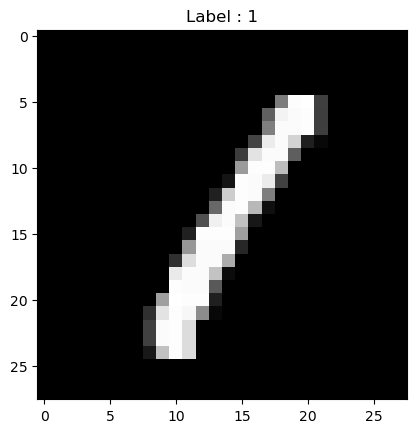

In [18]:
index = int(input("Enter the index : "))
get_image_using_index(index)

In [19]:
def show_images_of_digit(number):
    num = 10
    indeces = np.where(y_train == number)[0]
    num_images = num
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 2, 2))
    
    for i in range(num):
        image = x_train[indeces[i]].reshape(28, 28)
        axes[i].imshow(image, cmap='gray')
        axes[i].axis('off')
        axes[i].set_title(f'Image {indeces[i]}')
    
    plt.tight_layout()
    plt.show()

Enter the number whose images you want to see : 3


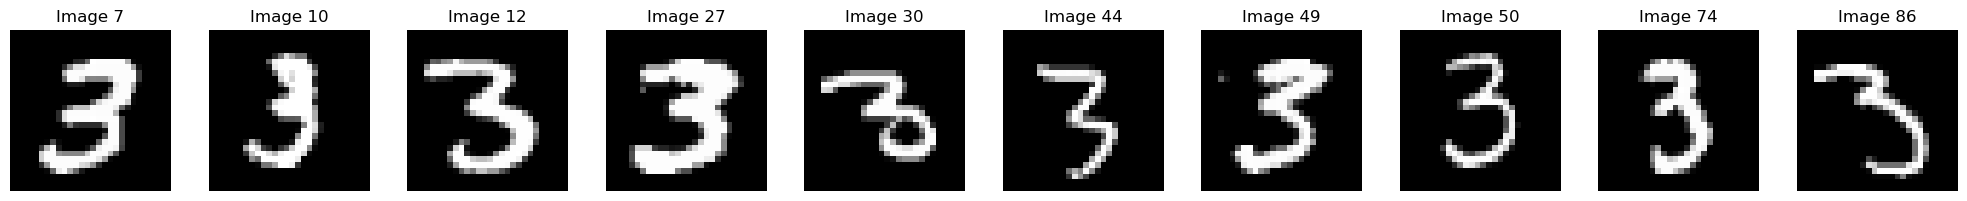

In [21]:
number = int(input("Enter the number whose images you want to see : "))
if(number < 0 or number > 9):
    print('Wrong choice of number!')
else:
    show_images_of_digit(number)

# Binary classification for 3 and 8

In [22]:
# Filter out only classes 3 and 8
class_3_8 = np.where((y_train == 3) | (y_train == 8))
X_train_bin = X_train[class_3_8]
y_train_bin = y_train[class_3_8]

In [23]:
# Convert labels to binary: 1 for class 3 and 0 for class 8
y_train_bin = np.where(y_train_bin == 3, 1, 0)

In [24]:
# Flatten images for input to the neural network
X_train_bin = X_train_bin.reshape(X_train_bin.shape[0], -1) / 255.0

In [25]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def sigmoid_derivative(self, z):
        return z * (1 - z)
    
    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = self.sigmoid(self.Z2)
        return self.A2
    
    def backward(self, X, y, output, learning_rate):
        # Backpropagation
        m = X.shape[0]
        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.sigmoid_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X, y, iterations):
        for t in range(1, iterations + 1):
            learning_rate = 1 / np.sqrt(t)
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            if t % 100 == 0:
                loss = np.mean((y - output) ** 2)
                print(f"Iteration {t}, Loss: {loss}")
    
    def predict(self, X):
        output = self.forward(X)
        predictions = np.where(output > 0.5, 1, 0)
        return predictions

In [26]:
# Create the neural network
nn = NeuralNetwork(input_size=784, hidden_size=100, output_size=1)

In [27]:
# Train the network
y_train_bin = y_train_bin.reshape(-1, 1)
nn.train(X_train_bin, y_train_bin, iterations=1000)
print("Training complete.")

Iteration 100, Loss: 0.09485328166394212
Iteration 200, Loss: 0.057012864045037775
Iteration 300, Loss: 0.04661648971150657
Iteration 400, Loss: 0.04167829057995604
Iteration 500, Loss: 0.0387789330584117
Iteration 600, Loss: 0.036853462717962936
Iteration 700, Loss: 0.035466869051952774
Iteration 800, Loss: 0.034409977557390004
Iteration 900, Loss: 0.03357021651029949
Iteration 1000, Loss: 0.032881718221003144
Training complete.


## Accuracy on training set

In [29]:
predictions = nn.predict(X_train_bin)
accuracy = accuracy_score(y_train_bin, predictions)

In [30]:
print(f"Accuracy on train set: {accuracy}")

Accuracy on train set: 0.9601902854281422


## Accuracy on test set

In [31]:
import time
from sklearn.metrics import accuracy_score

In [32]:
# Time the training
start_time = time.time()

In [33]:
# Load test set
(_, _), (X_test, y_test) = mnist.load_data()
test_filter = np.where((y_test == 3) | (y_test == 8))
X_test_bin = X_test[test_filter].reshape(-1, 784) / 255.0
y_test_bin = np.where(y_test[test_filter] == 3, 1, 0)

In [34]:
# Test the network
predictions = nn.predict(X_test_bin)
accuracy = accuracy_score(y_test_bin, predictions)
training_time = time.time() - start_time

In [35]:
print(f"Accuracy on test set: {accuracy}")
print(f"Training time: {training_time} seconds")

Accuracy on test set: 0.9662298387096774
Training time: 19.27421808242798 seconds


# Multiclass classification for 10 outputs

In [36]:
from keras.utils import to_categorical

In [37]:
# Flatten the images and normalize pixel values
X_train_multiclass = X_train.reshape(X_train.shape[0], -1) / 255.0
y_train_multiclass = to_categorical(y_train, num_classes=10)

In [38]:
X_test_multiclass = X_test.reshape(X_test.shape[0], -1) / 255.0
y_test_multiclass = to_categorical(y_test, num_classes=10)

In [39]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

In [40]:
class MulticlassNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights
        self.W1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, z):
        return np.maximum(0, z)
    
    def relu_derivative(self, z):
        return np.where(z > 0, 1, 0)
    
    def forward(self, X):
        # Forward propagation
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = self.relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2
    
    def backward(self, X, y, output, learning_rate):
        # Backpropagation
        m = X.shape[0]
        dZ2 = output - y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        
        dA1 = np.dot(dZ2, self.W2.T)
        dZ1 = dA1 * self.relu_derivative(self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m
        
        # Update weights
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
    
    def train(self, X, y, iterations):
        for t in range(1, iterations + 1):
            learning_rate = 1 / np.sqrt(t)
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)
            if t % 100 == 0:
                loss = -np.mean(np.sum(y * np.log(output + 1e-8), axis=1))  # Cross-entropy loss
                print(f"Iteration {t}, Loss: {loss}")
    
    def predict(self, X):
        output = self.forward(X)
        predictions = np.argmax(output, axis=1)
        return predictions

In [41]:
# Create the multiclass neural network
nn_multiclass = MulticlassNeuralNetwork(input_size=784, hidden_size=100, output_size=10)

In [42]:
# Train the network on the multiclass MNIST dataset
nn_multiclass.train(X_train_multiclass, y_train_multiclass, iterations=1000)

Iteration 100, Loss: 0.5431095493104755
Iteration 200, Loss: 0.43306521084905397
Iteration 300, Loss: 0.39236889928965807
Iteration 400, Loss: 0.36986038214394956
Iteration 500, Loss: 0.3549482771470647
Iteration 600, Loss: 0.3439606764744318
Iteration 700, Loss: 0.33530651584956844
Iteration 800, Loss: 0.32821383066335164
Iteration 900, Loss: 0.3221987898686543
Iteration 1000, Loss: 0.3169798617121611


## Accuracy on training set

In [43]:
y_pred_multiclass = nn_multiclass.predict(X_train_multiclass)
y_train_labels = np.argmax(y_train_multiclass, axis=1)

In [44]:
accuracy_multiclass = np.mean(y_pred_multiclass == y_train_labels)
print(f"Multiclass Classification Accuracy: {accuracy_multiclass}")

Multiclass Classification Accuracy: 0.91035


## Accuracy on test set

In [45]:
y_pred_multiclass = nn_multiclass.predict(X_test_multiclass)
y_test_labels = np.argmax(y_test_multiclass, axis=1)

In [46]:
accuracy_multiclass = np.mean(y_pred_multiclass == y_test_labels)
print(f"Multiclass Classification Accuracy: {accuracy_multiclass}")

Multiclass Classification Accuracy: 0.9127
